In [1]:
import yfinance as yf
from lbm.tranformations.returns import get_returns

start='2024-01-01'
end='2024-12-31'
ticker = 'VOO'

prices = yf.download(ticker, start=start, end=end)
prices = prices['Close']
returns = get_returns(prices)
initial_price = prices.iloc[0, 0]

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
from matplotlib import pyplot as plt

plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600

def price_plot(price_dfs, labels):
    for price_df in price_dfs:
        plt.plot(price_df)
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend(labels)
    plt.show()

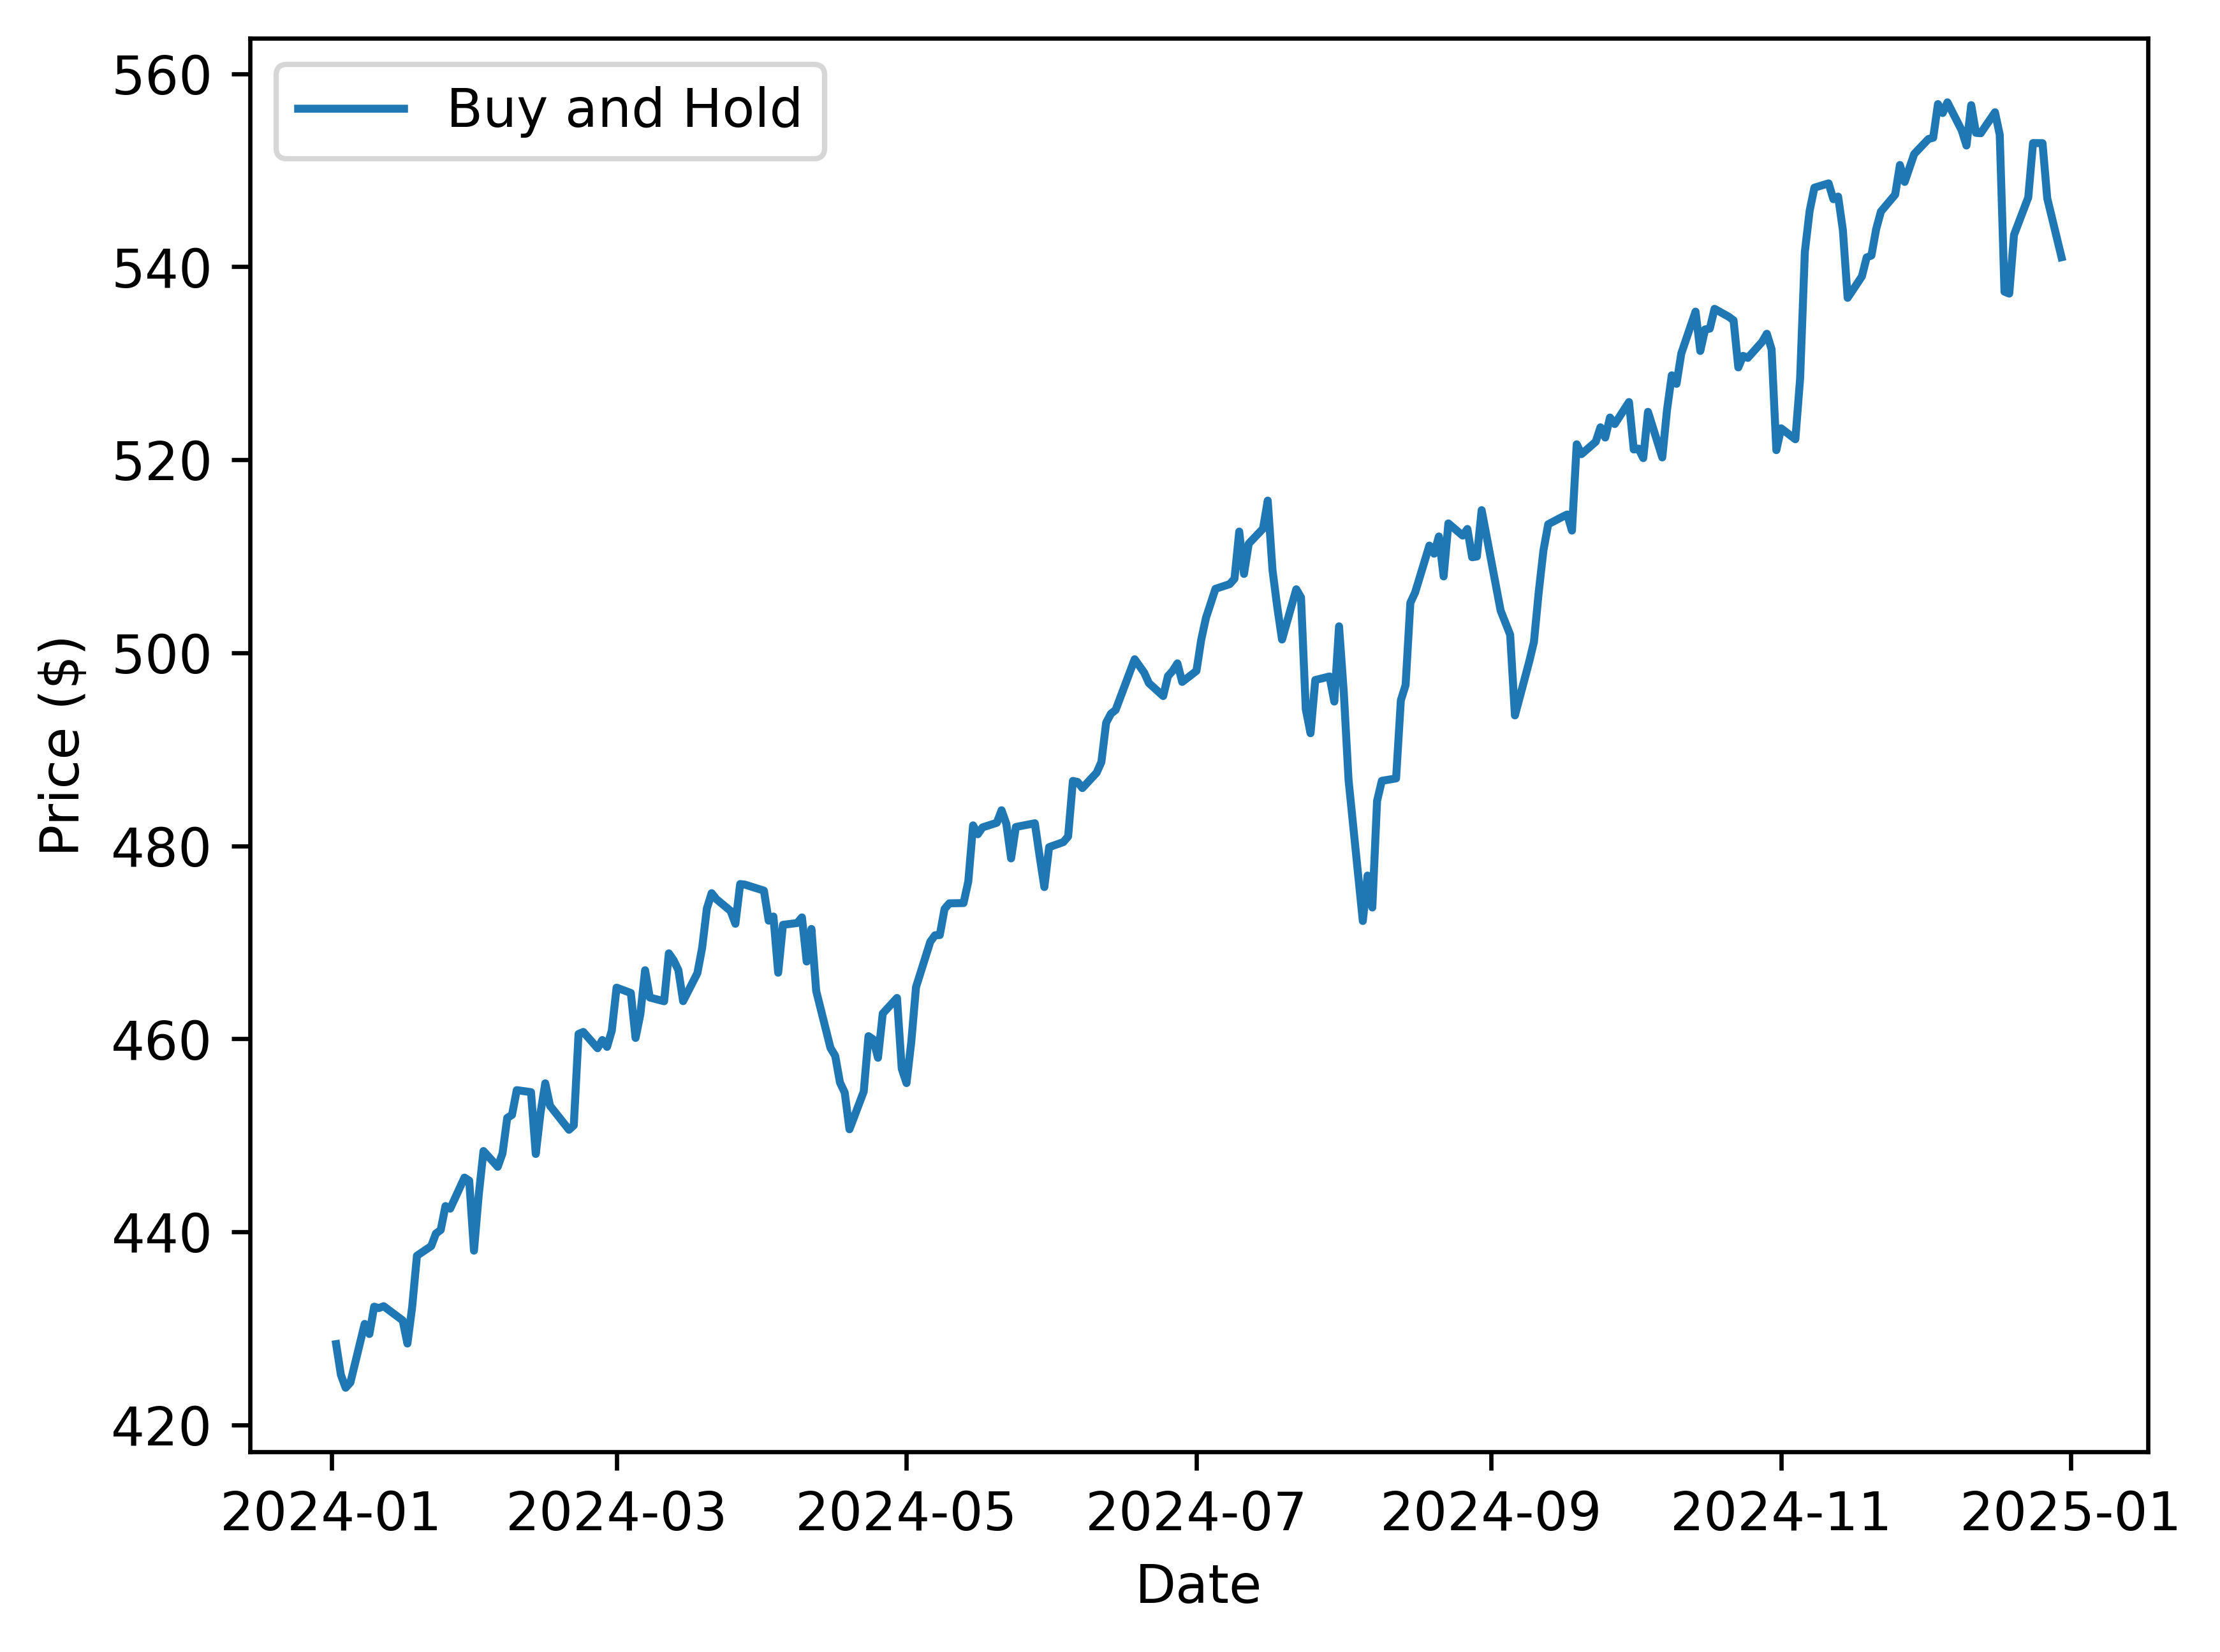

In [3]:
prices_list = [prices]
labels = ["Buy and Hold"]

price_plot(prices_list, labels)

In [4]:
from lbm.tranformations.returns import apply_returns

up_returns = returns.clip(lower=0.0)
up_prices = apply_returns(initial_price, up_returns)

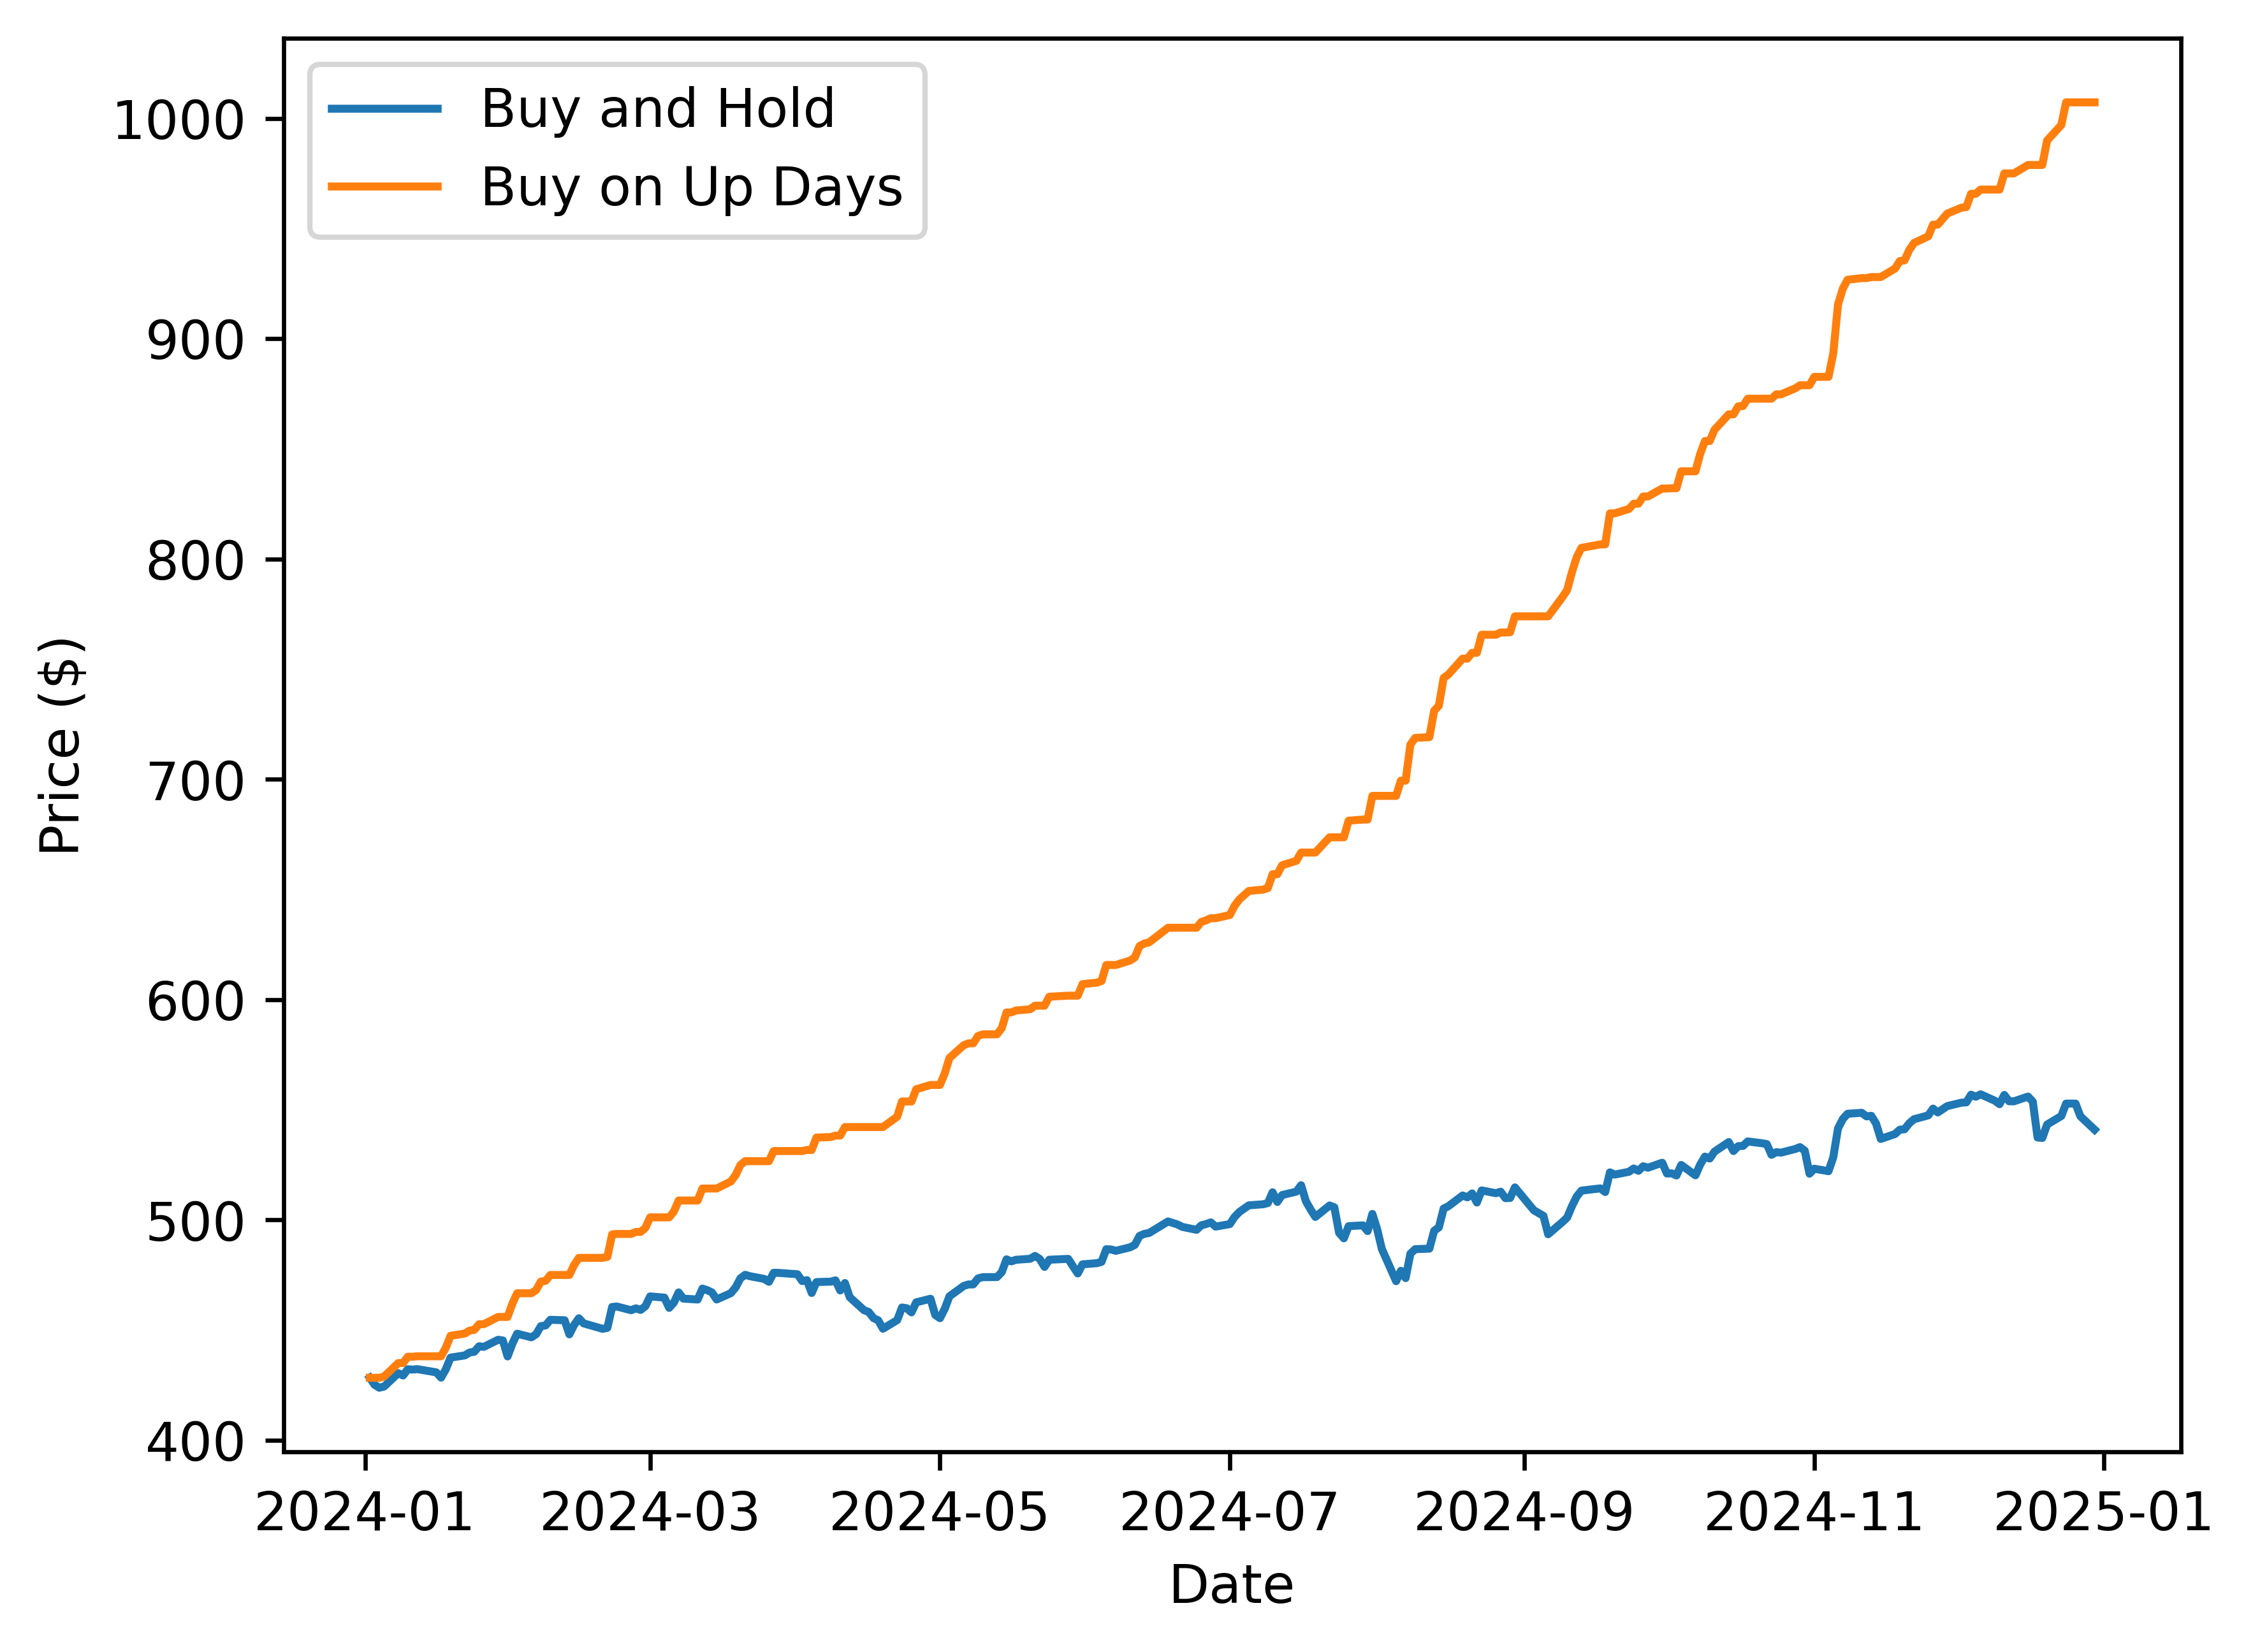

In [5]:
prices_list.append(up_prices)
labels.append("Buy on Up Days")
price_plot(prices_list, labels)

In [6]:
long_short_returns = returns.abs()
long_short_prices = apply_returns(initial_price, long_short_returns)

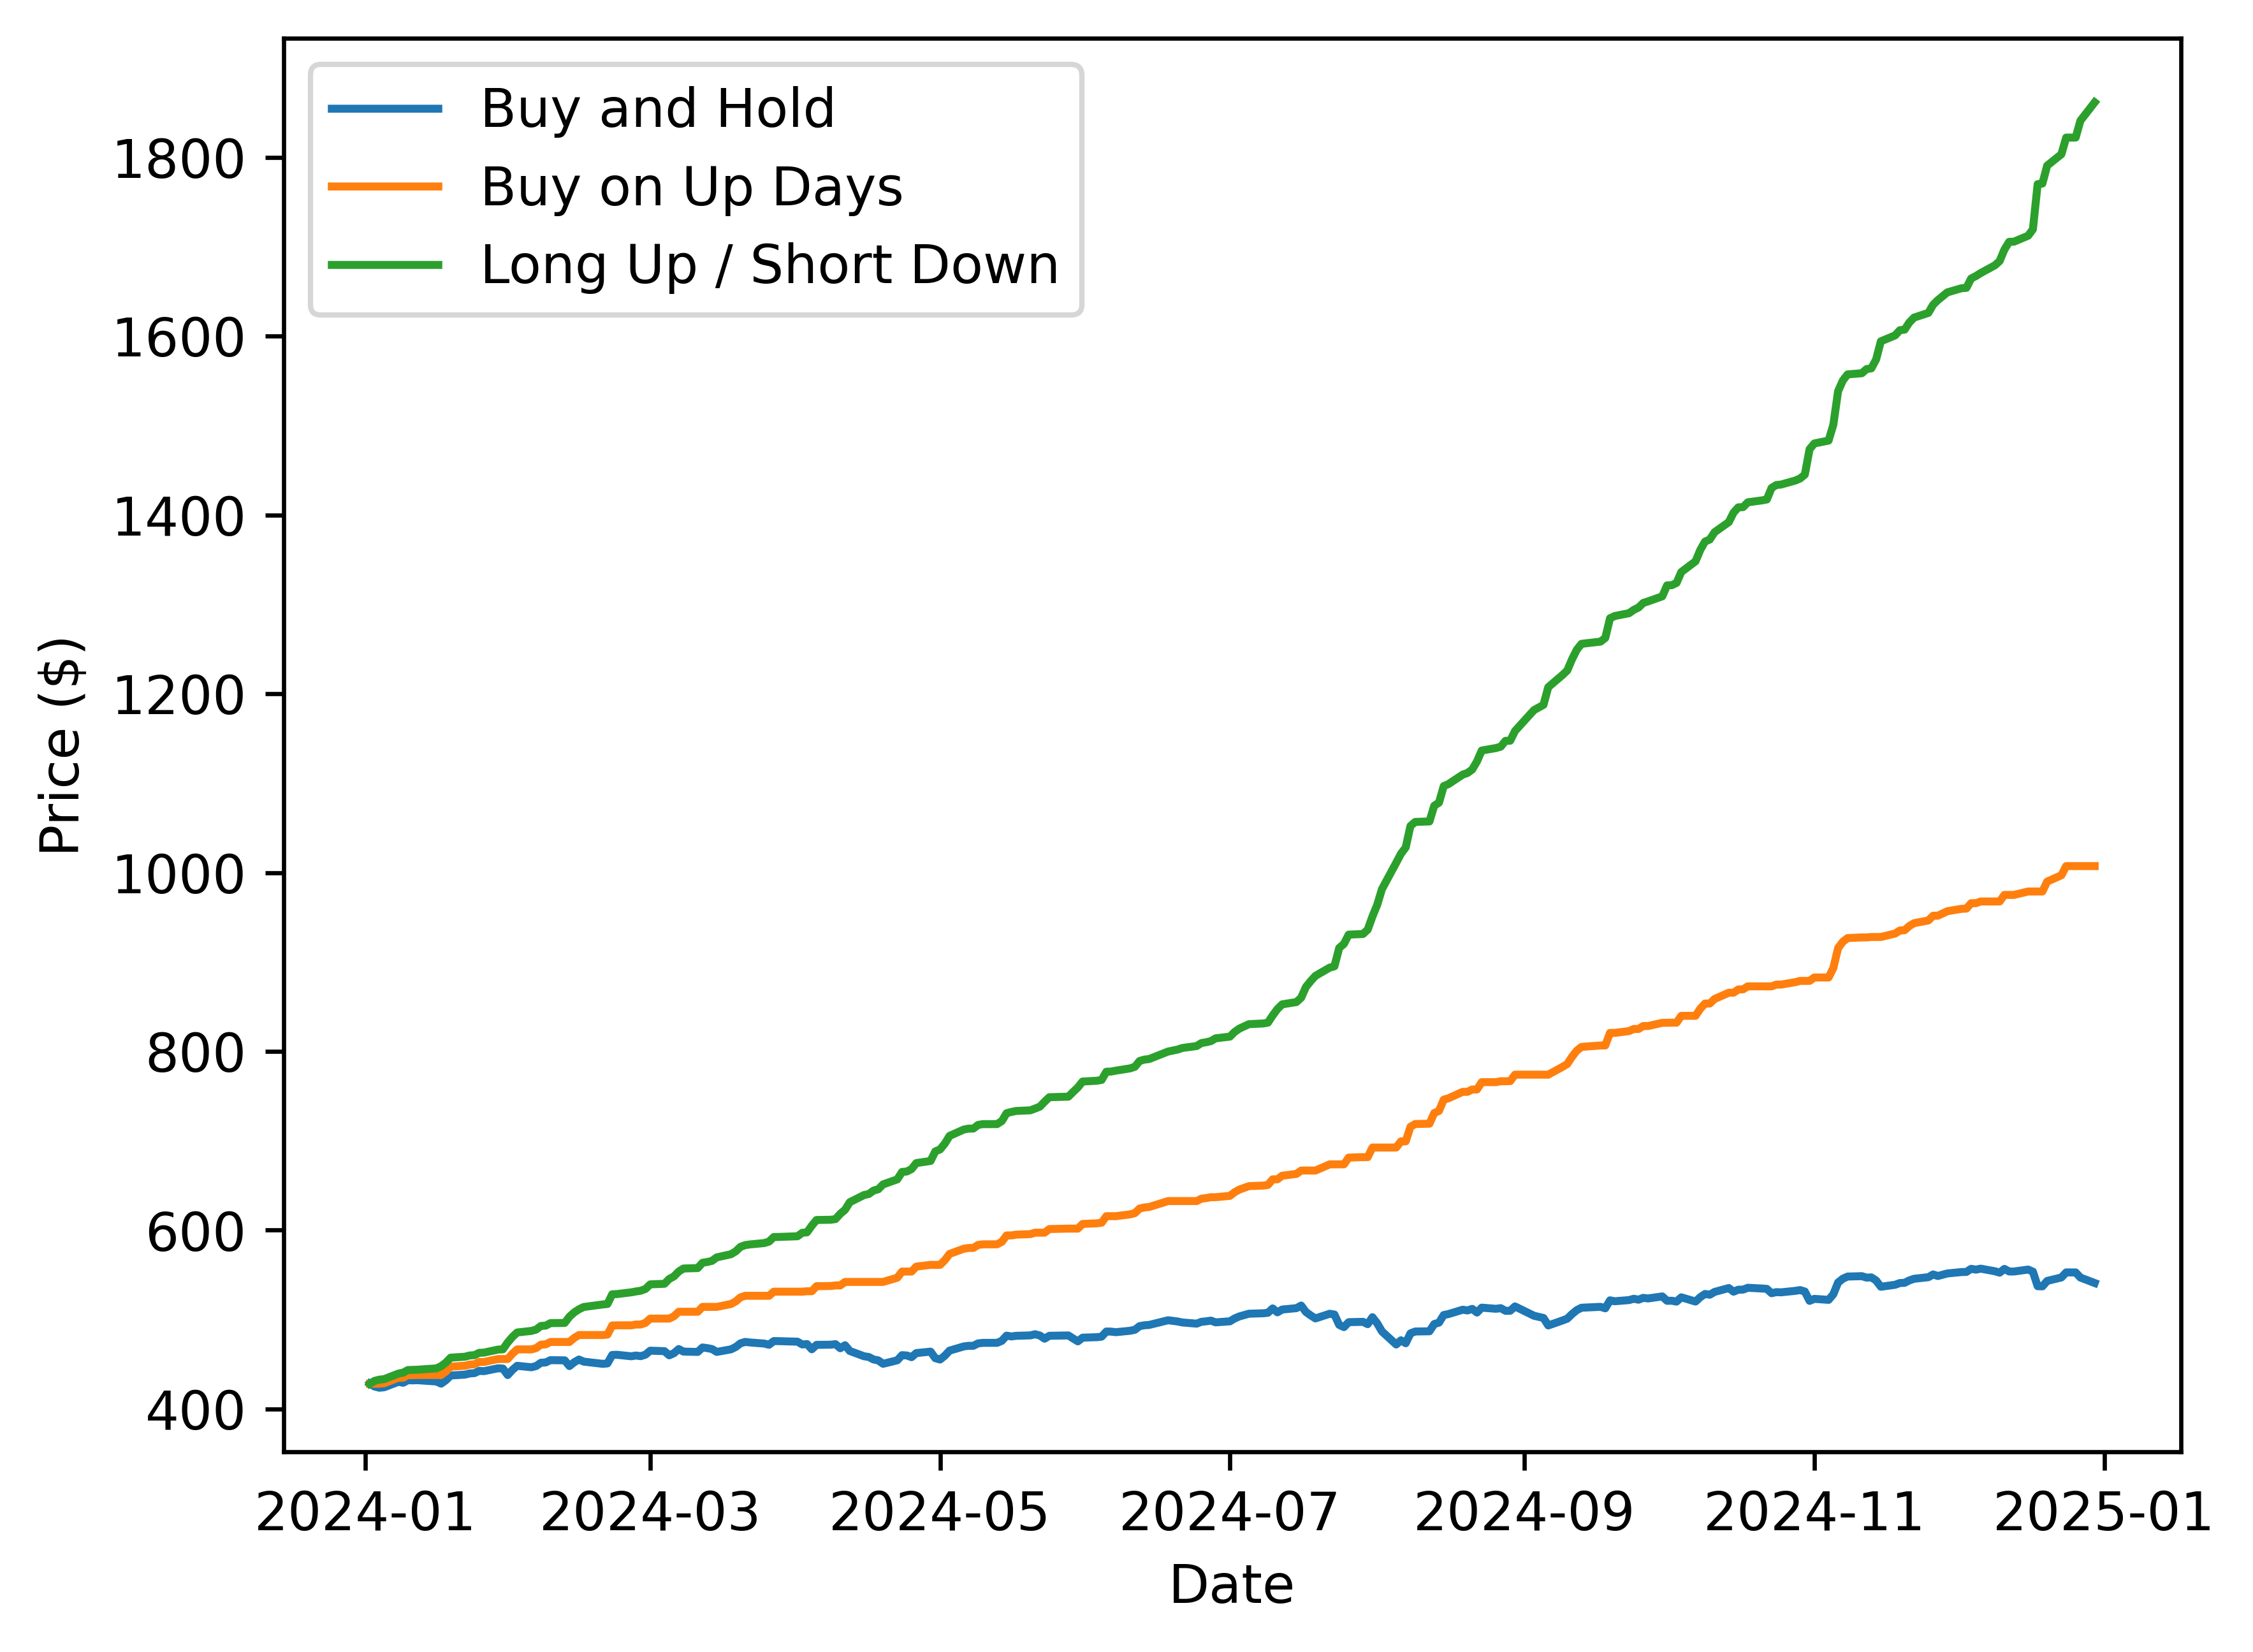

In [7]:
prices_list.append(long_short_prices)
labels.append("Long Up / Short Down")
price_plot(prices_list, labels)

In [8]:
levered_returns = long_short_returns * 2.0
levered_prices = apply_returns(initial_price, levered_returns)

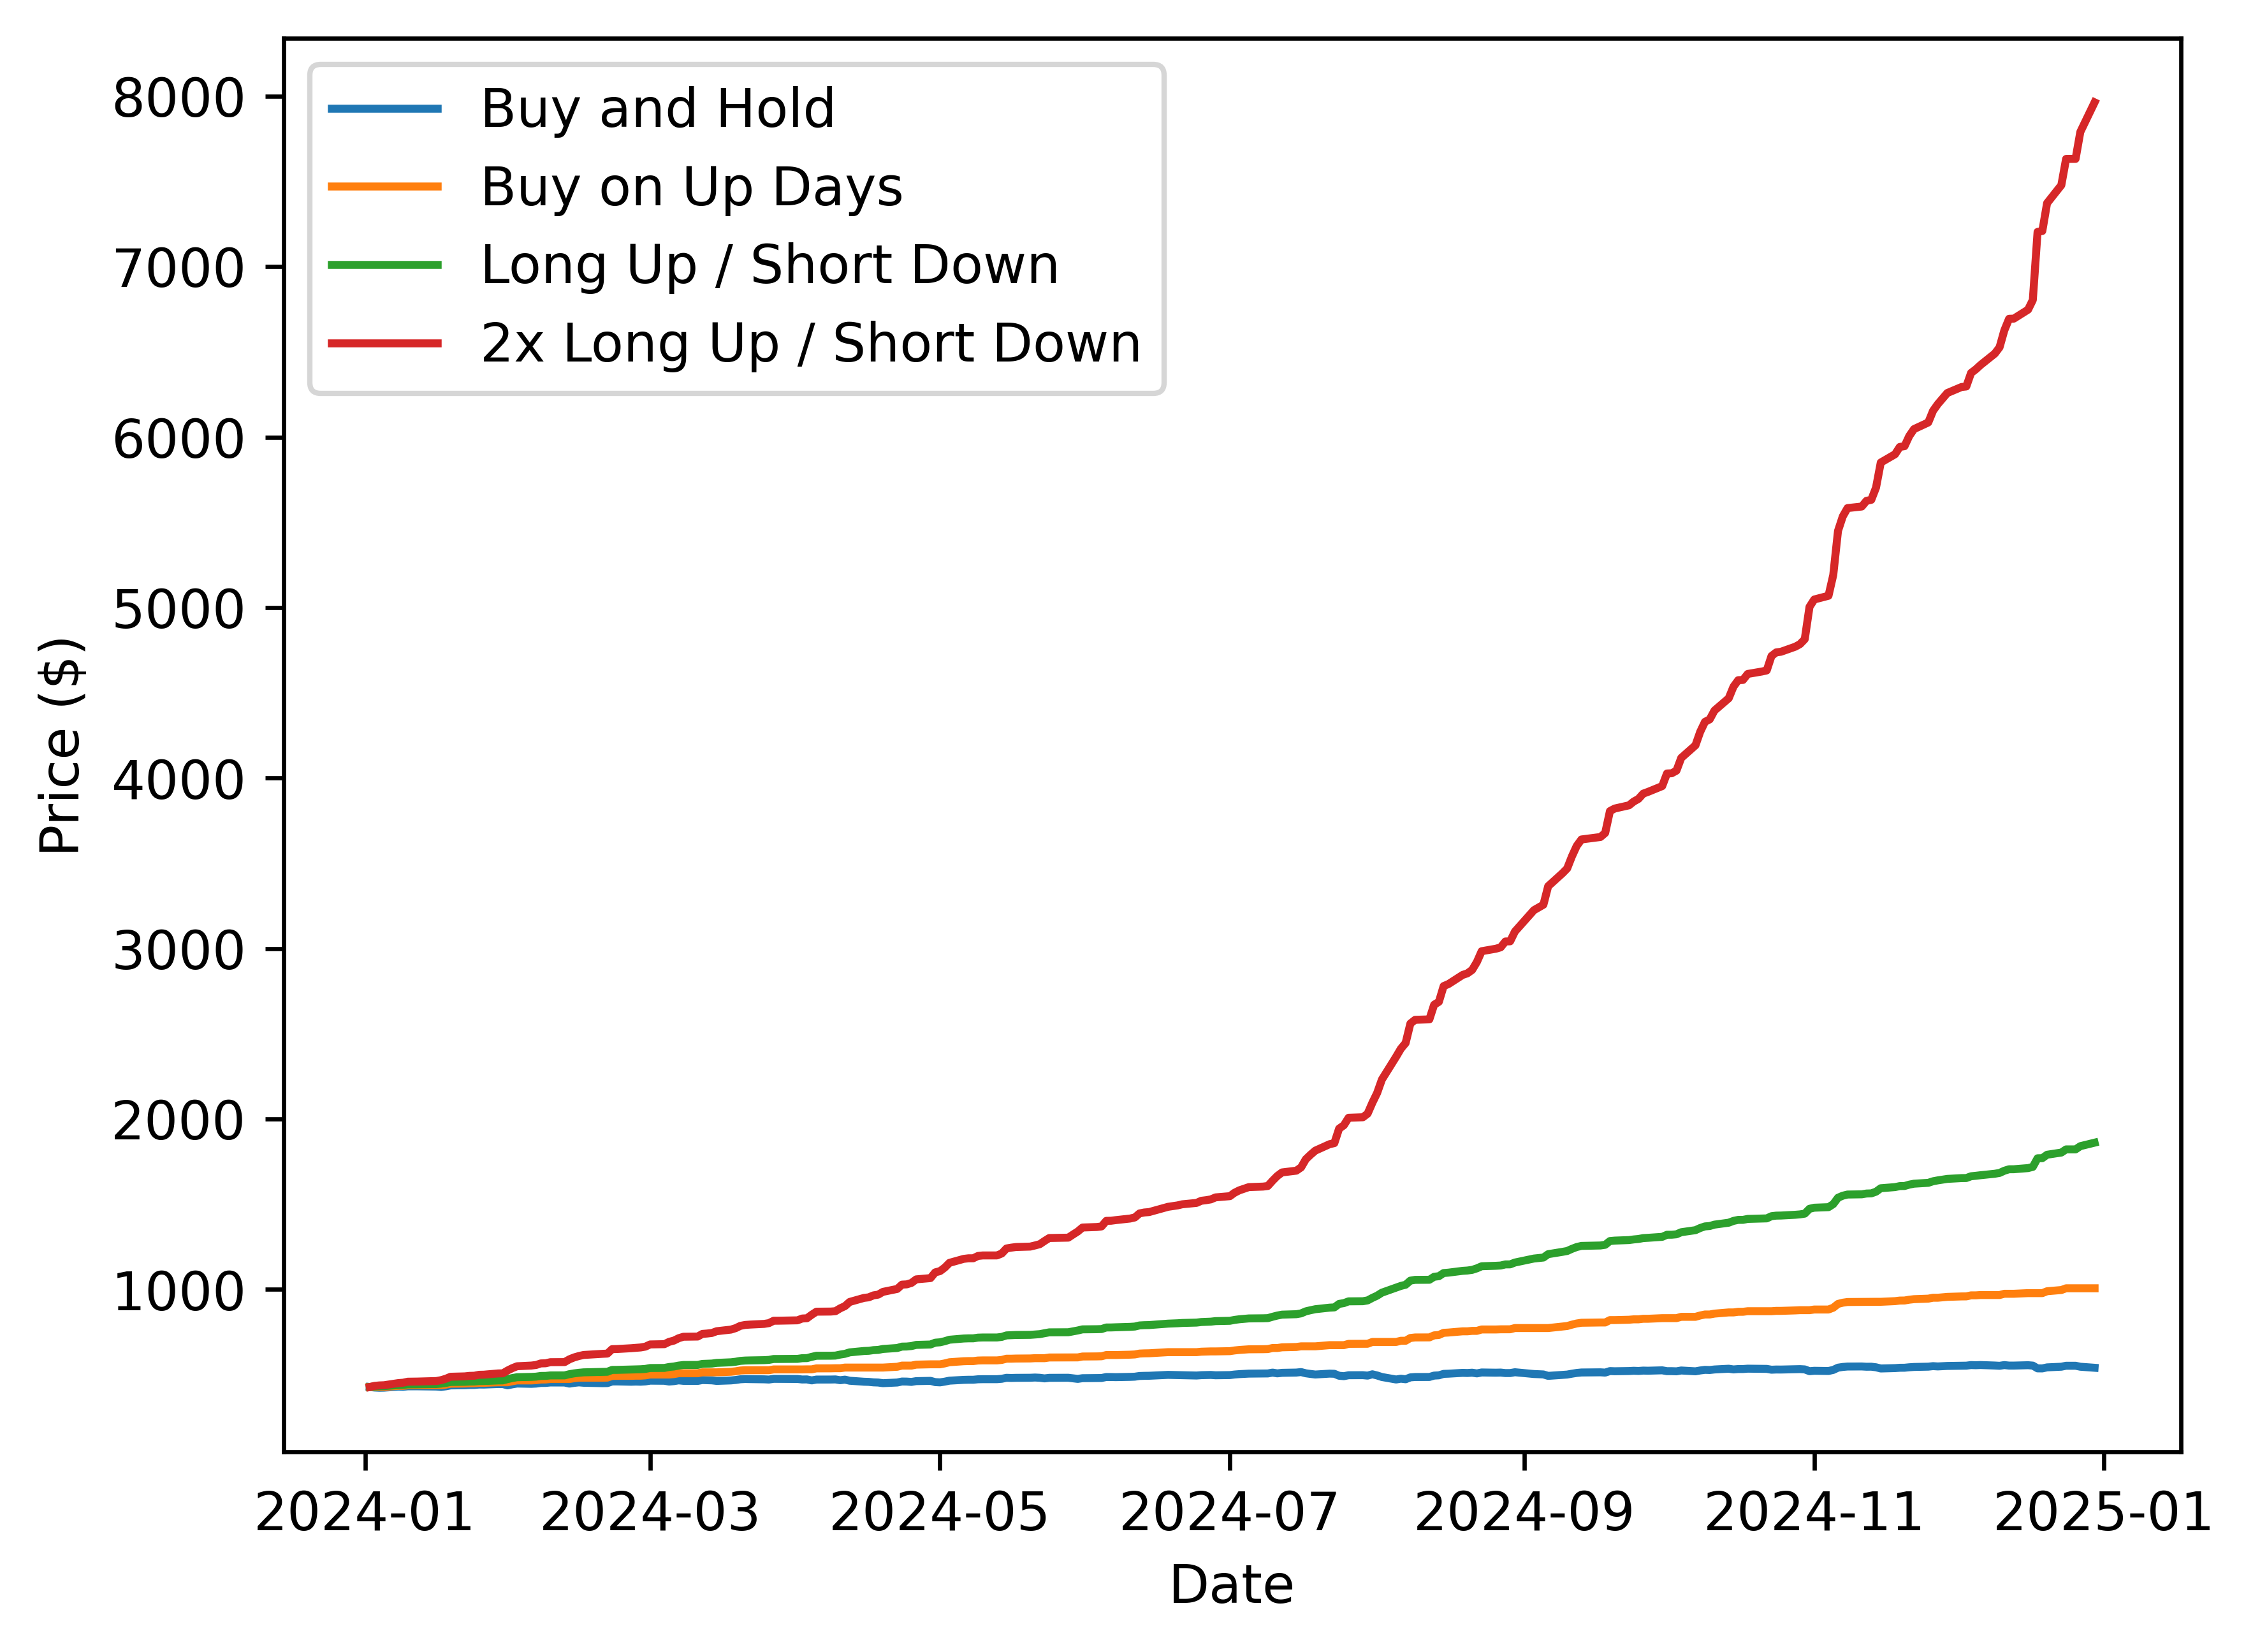

In [9]:
prices_list.append(levered_prices)
labels.append("2x Long Up / Short Down")
price_plot(prices_list, labels)

In [12]:
import numpy as np
import pandas as pd

def random_sign_flip(df, p=0.5):
    """
    Returns a new DataFrame in which each cell from df is kept as-is
    with probability p and flipped in sign with probability (1-p).
    """        
    # Create a random mask the same shape as df
    # True in a cell => keep sign; False => flip sign.
    mask = np.random.rand(*df.shape) < p
    
    # Convert df to a NumPy array for elementwise sign flipping
    df_values = df.values  # or df.to_numpy()
    
    # Flip sign where mask is False
    # np.where(condition, value_if_true, value_if_false)
    flipped_values = np.where(mask, df_values, -df_values)
    
    # Convert back to a DataFrame with original labels
    return pd.DataFrame(flipped_values, index=df.index, columns=df.columns)

In [15]:
correctness = 0.6
incorrect_forecasts = random_sign_flip(returns, p=correctness)


In [18]:
x = (incorrect_forecasts > 0.0).astype(float)
up_returns_60 = returns * x
up_prices_60 = apply_returns(initial_price, up_returns_60)


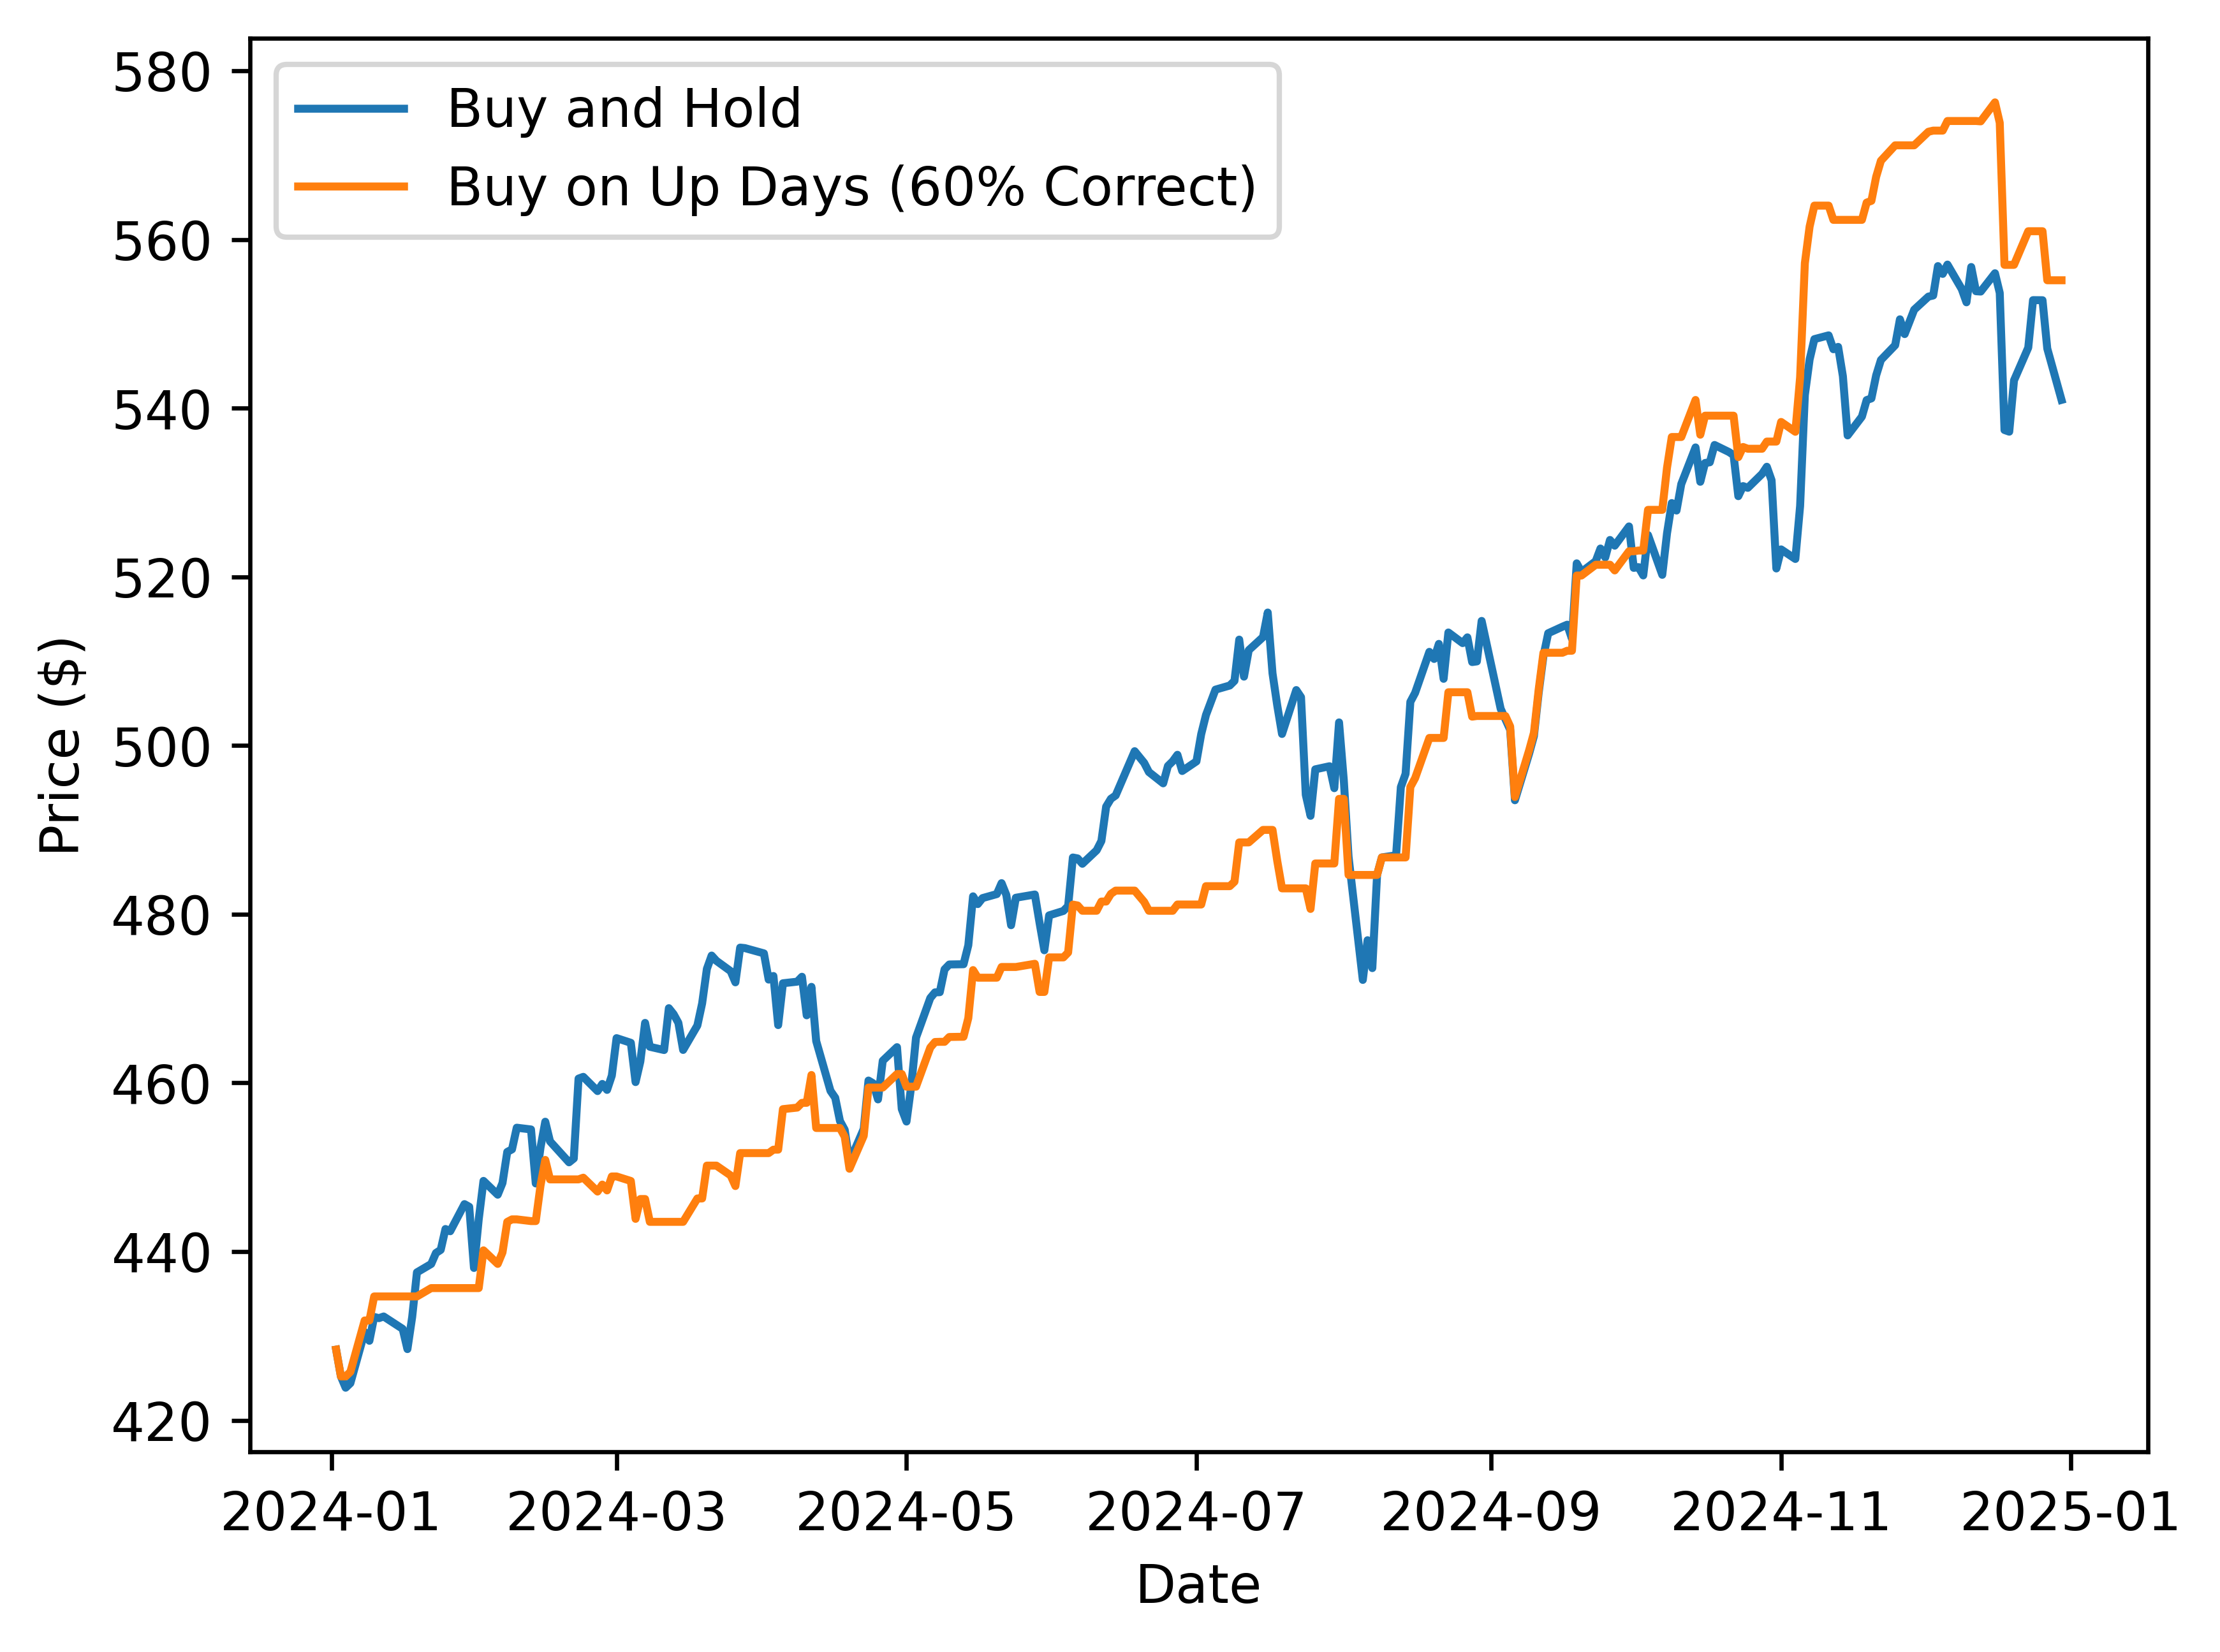

In [19]:
prices_list = [prices]
labels = ["Buy and Hold"]
prices_list.append(up_prices_60)
labels.append("Buy on Up Days (60% Correct)")
price_plot(prices_list, labels)

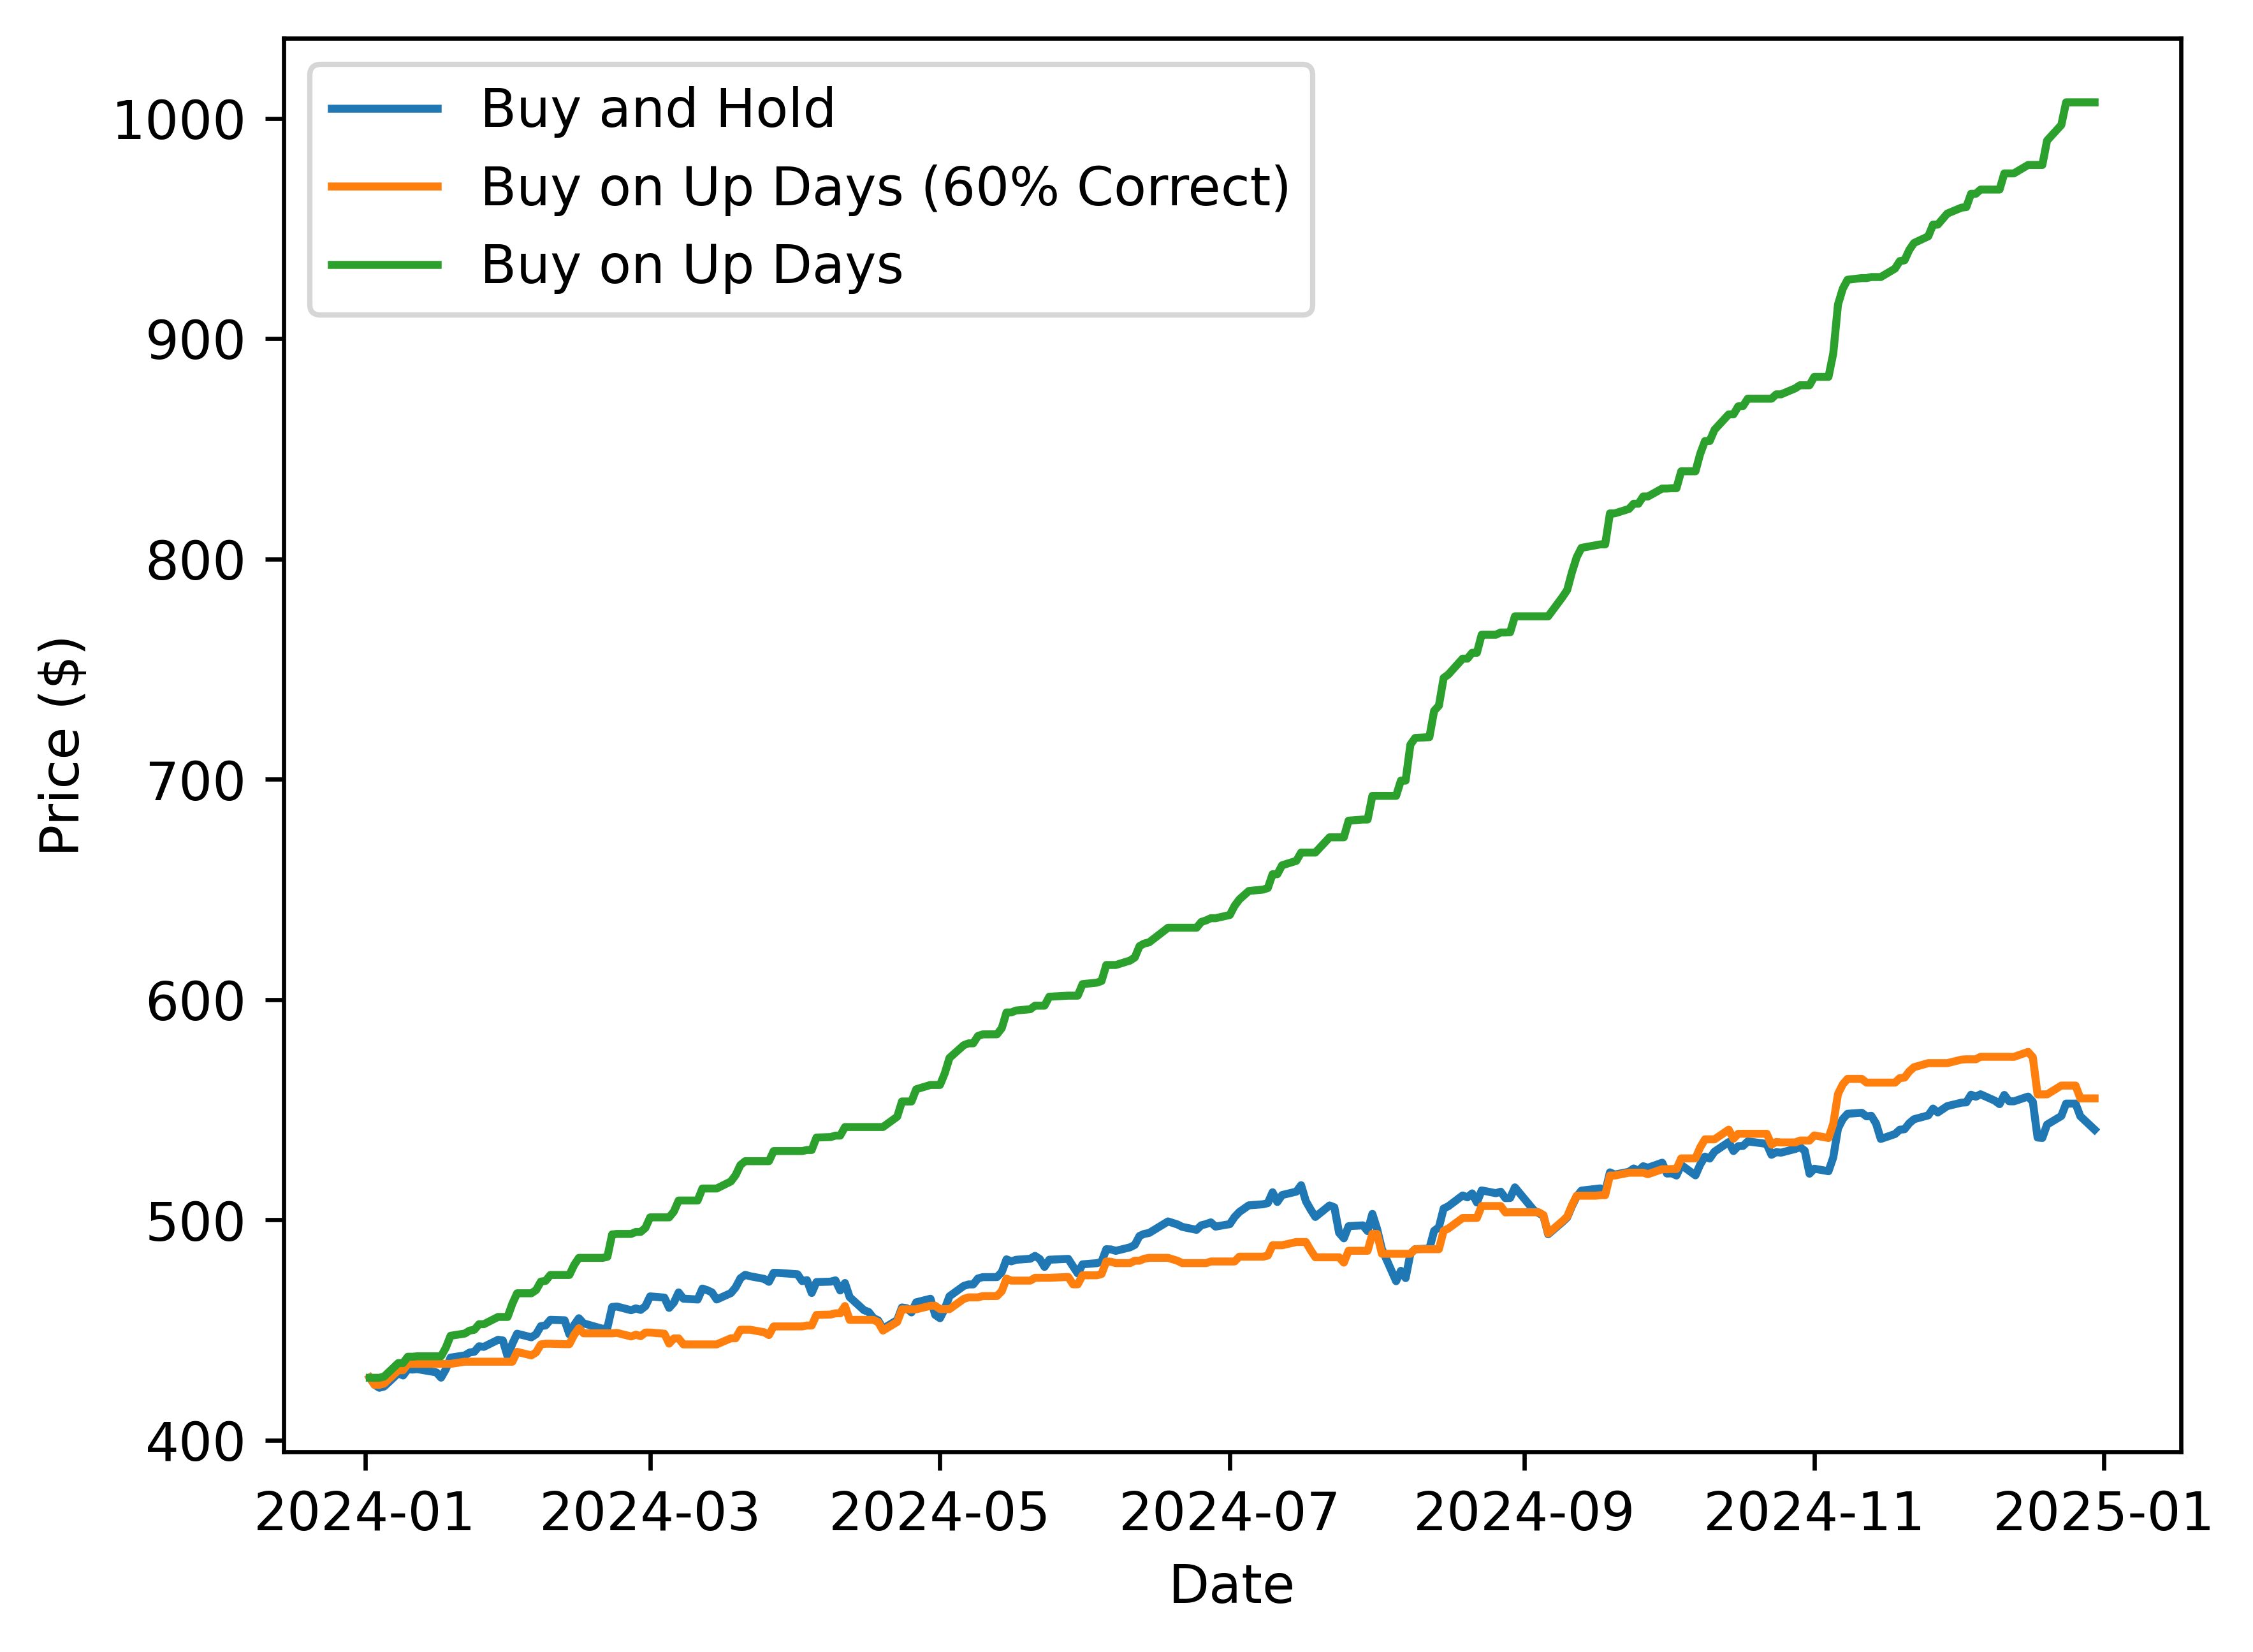

In [20]:
prices_list.append(up_prices)
labels.append("Buy on Up Days")
price_plot(prices_list, labels)